In [10]:
# evaluate regression model and promote performance

# load data
import pandas as pd

df = pd.read_csv('./boston_house_prices.csv', header=None)
df.columns = df.iloc[0, :]
df = df.drop([0])
print(df.head())

0     CRIM  ZN INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO  \
1  0.00632  18  2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   
2  0.02731   0  7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   
3  0.02729   0  7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8   
4  0.03237   0  2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7   
5  0.06905   0  2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   

0       B LSTAT  MEDV  
1   396.9  4.98    24  
2   396.9  9.14  21.6  
3  392.83  4.03  34.7  
4  394.63  2.94  33.4  
5   396.9  5.33  36.2  


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# split datasets
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_train = y_train.astype('float')
y_test = y_test.astype('float')

# train model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

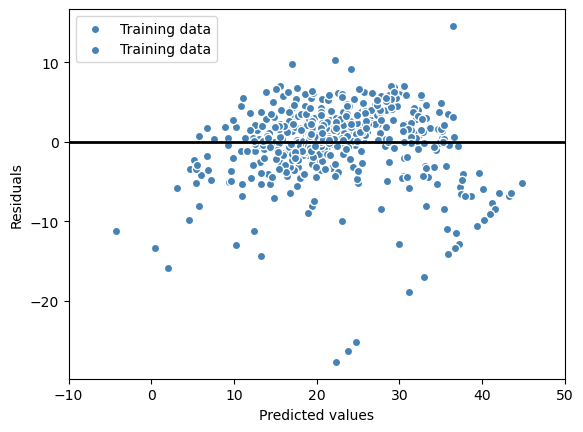

In [12]:
# 1. Rasidual
# visulize rasidual map

import matplotlib.pyplot as plt

train_rasidual = y_train_pred - y_train
test_rasidual = y_test_pred - y_test
plt.scatter(y_train_pred, train_rasidual, 
            c='steelblue', marker='o', 
            edgecolor='white', label='Training data')
plt.scatter(y_test_pred, test_rasidual, 
            c='steelblue', marker='o', 
            edgecolor='white', label='Training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.show()

In [13]:
# 2. Mean Squared Error, MSE(equals to final SSE)
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), 
                                       mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


In [14]:
# 3. R^2 (standardized MSE)
from sklearn.metrics import r2_score

print('R2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), 
                                       r2_score(y_test, y_test_pred)))

R2 train: 0.765, test: 0.673


In [ ]:
# L1, L2, ElasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
elasticnet = ElasticNet(alpha=1.0, l1_ratio=0.5)  # 1:1 = l1:l2